In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx

In [3]:
df_disagg = pd.read_csv('population_disagg.csv').set_index('GM_CODE')

In [4]:
dfg = gpd.read_file('shapes_gemeente/gemeente_2020_v2.shp').set_index('GM_CODE')
#dfg = dfg['geometry']
#dfg.index.duplicated()

In [5]:
dfg = dfg[dfg['H2O'] == 'NEE']

In [6]:
dfg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 355 entries, GM0003 to GM1978
Columns: 180 entries, GM_NAAM to geometry
dtypes: float64(96), geometry(1), int64(80), object(3)
memory usage: 502.0+ KB


In [7]:
df2 = df_disagg.join(dfg['geometry'])

In [8]:
df2 = gpd.GeoDataFrame(df2[df2['geometry'].notna()],geometry='geometry')

In [9]:
df2['area km2'] = df2.area / 1000000

In [10]:
df2['AANT_INW density'] = df2['AANT_INW'] / df2['area km2']

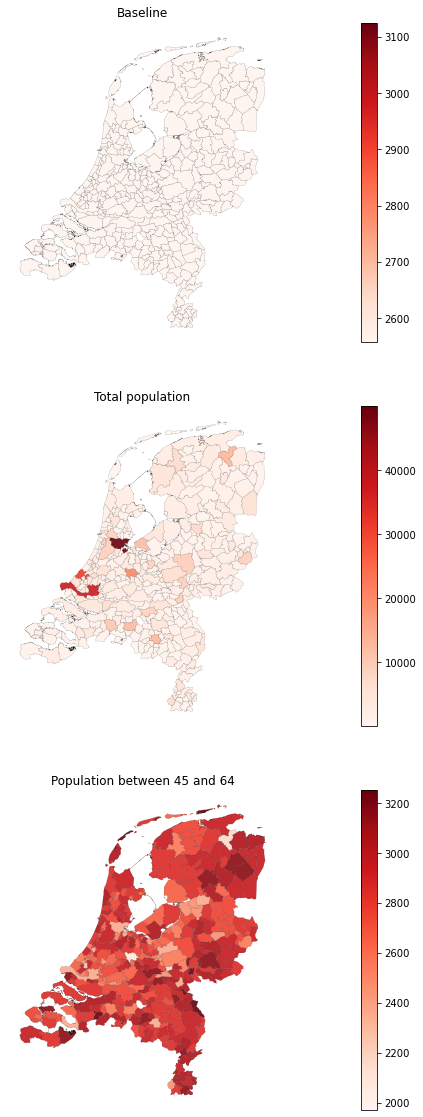

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(30, 20))
df2.plot(ax=ax1,column='baseline',legend=True,cmap='Reds',edgecolor='black',linewidth=0.1,alpha=1)
ax1.set_title('Baseline')
ax1.set_axis_off()

df2.plot(ax=ax2,column='aant_inw_original',legend=True,cmap='Reds',edgecolor='black',linewidth=0.1,alpha=0.9)
ax2.set_title('Total population')
ax2.set_axis_off()

df2.plot(ax=ax3,column='between_45_64',legend=True,cmap='Reds',edgecolor='black',linewidth=0.1,alpha=0.9)
ax3.set_title('Population between 45 and 64')
ax3.set_axis_off()
#fig.patch.set_facecolor('xkcd:taupe')
#cx.add_basemap(ax, crs=df2.crs)



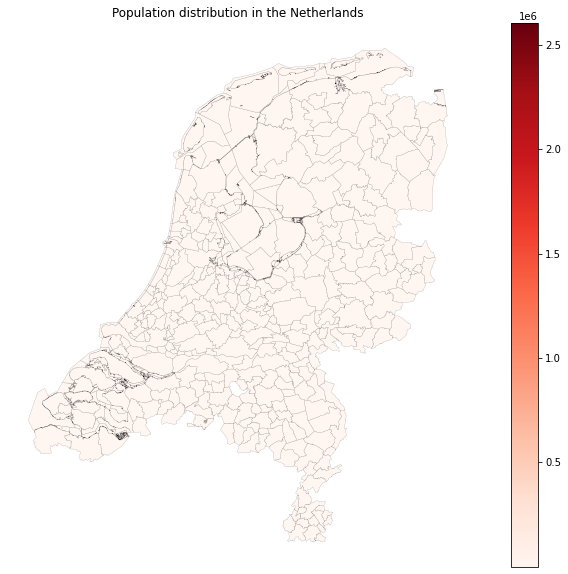

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))
df2.plot(ax=ax,column='AANT_INW density',legend=True,cmap='Reds',edgecolor='black',linewidth=0.1,alpha=0.9)
ax.set_title('Population distribution in the Netherlands')
ax.set_axis_off()

In [17]:
df2

,baseline,aant_inw_original,between_45_64,AANT_INW,geometry,area km2,AANT_INW density
GM_CODE,,,,,,,
GM0014,2841,13349,2168,233273,"POLYGON ((227979.943 584879.819, 227981.153 58...",197.960473,1178.381709
GM0034,2841,12287,2759,214715,"MULTIPOLYGON (((142993.687 482642.725, 142993....",139.203837,1542.450297
GM0037,2841,1817,2956,31754,"POLYGON ((258898.084 557450.734, 258897.941 55...",119.944106,264.739978
GM0047,2841,1569,2956,27417,"POLYGON ((250623.405 572132.283, 250964.875 57...",78.678839,348.467266
GM0050,2841,1309,3055,22879,"MULTIPOLYGON (((170535.750 487005.250, 170543....",252.528289,90.599750
...,...,...,...,...,...,...,...
GM1963,2841,5038,2858,88047,"MULTIPOLYGON (((84447.802 413939.947, 84447.80...",281.862324,312.375911
GM1966,2841,2737,2956,47834,"MULTIPOLYGON (((217037.735 601967.991, 217043....",487.850607,98.050508
GM1969,2841,3644,2858,63678,"POLYGON ((211363.510 585818.360, 211364.156 58...",368.845701,172.641297


In [21]:
df2['aant_inw_original'].loc[df2['AANT_INW'] == 873338]

GM_CODE
GM0363    49975
Name: aant_inw_original, dtype: int64

In [24]:
columns = ['aant_inw_original','baseline','between_45_64']
for i in columns:
    print(i, df2[i]['GM0363'])


aant_inw_original 49975
baseline 2841
between_45_64 2365


In [ ]:
df2['AANT_INW']['GM0363']

In [ ]:
df2['area km2']['GM1970']

In [20]:
df2.index.duplicated()
df2.index.drop_duplicates()
df2.index.drop_duplicates()

Index(['GM0014', 'GM0034', 'GM0037', 'GM0047', 'GM0050', 'GM0059', 'GM0060',
       'GM0072', 'GM0074', 'GM0080',
       ...
       'GM1954', 'GM1955', 'GM1959', 'GM1960', 'GM1961', 'GM1963', 'GM1966',
       'GM1969', 'GM1970', 'GM1978'],
      dtype='object', name='GM_CODE', length=351)